In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/Data Science/bank_amazon

%pip install seaborn
%pip install matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Data Science/bank_amazon
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Score silhouette clustering :0.4663586944744787


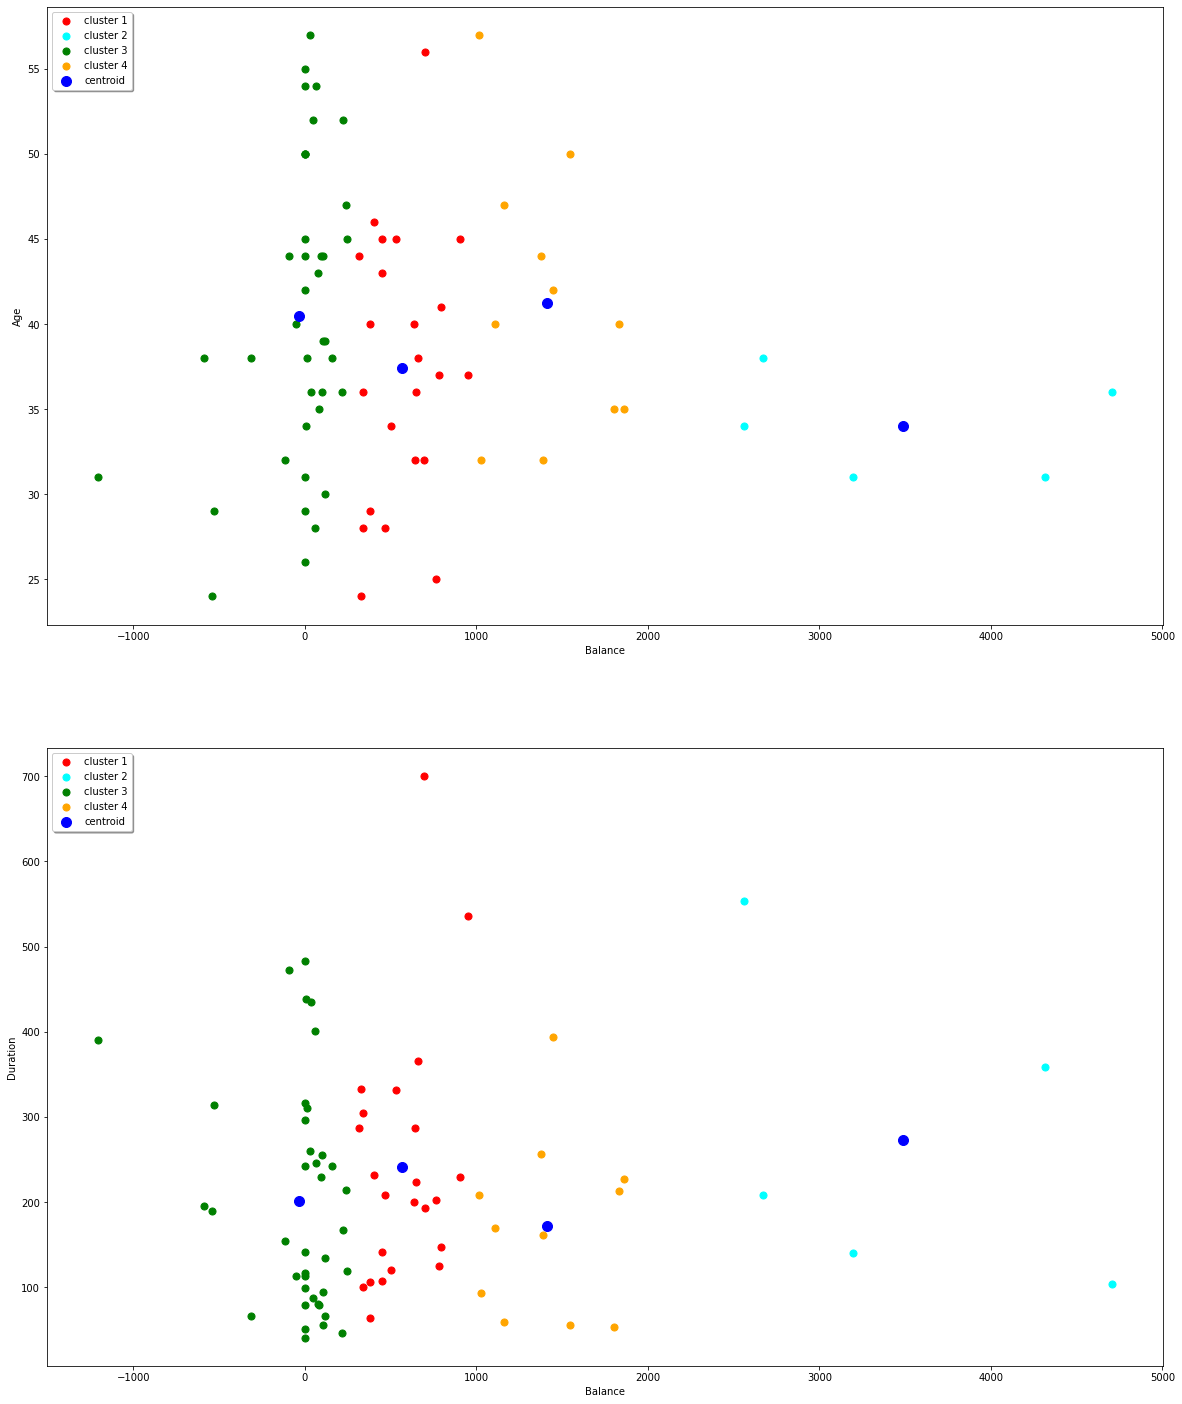

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from numpy import concatenate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import resample
from scipy import stats


S = pd.read_csv('./BankCustomerData.csv')

S['job']=S['job'].astype('category').cat.codes
S['marital']=S['marital'].astype('category').cat.codes
S['education']=S['education'].astype('category').cat.codes
S['default']=S['default'].astype('category').cat.codes
S['housing']=S['housing'].astype('category').cat.codes
S['loan']=S['loan'].astype('category').cat.codes
S['contact']=S['contact'].astype('category').cat.codes
S['month']=S['month'].astype('category').cat.codes
S['poutcome']=S['poutcome'].astype('category').cat.codes
S['term_deposit']=S['term_deposit'].astype('category').cat.codes



"""
#PCA
pca = PCA(n_components=2)
pca.fit(S)
S = PCA.transform(pca,S)

"""
S = S.loc[np.random.permutation(S.index)[:150]]  #SUBSAMPLE
S = S[(np.abs(stats.zscore(S)) < 2).all(axis=1)]

S = S[["balance", "age", "duration"]] #teoricamente alto balance più tempo sta al telefono

# Undersample
#S = resample(S, replace=True, n_samples=100, random_state=100)
 
#S = normalize(S, norm='l2', axis=1, copy=False, return_norm=False) #NOTA BENE : SENZA NORMALIZZAZIONE IL CLUSTERING AVVIENE SOLO IN BASE A BALANCE IN QUANTO E' SU UNA SCALA MOLTO PIU ALTA RISPETTO LE ALTRE FEATURES

#NORMALIZZAZONI SENSATE: "l1", axis=1, n_cluster=3,4,5,6;  "l2", axis=1, n_cluster=4,5,6; 

"""
#Elbow curve analysis
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(S)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5)).gca()
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(range(2, 20), distorsions)

plt.grid(True)
plt.title('Elbow curve')
"""

"""
#Silhouette analysis
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(S)
    score = silhouette_score(S, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
"""

kmeans = KMeans(n_clusters=4,init='k-means++',max_iter = 500, n_init = 1)
label = kmeans.fit_predict(S)
score = silhouette_score(S, kmeans.labels_)

print("Score silhouette clustering :"+str(score))
#selezioamo i vari cluster

filtered_label0 = S[label == 0]
 
filtered_label1 = S[label == 1]

filtered_label2 = S[label == 2]

filtered_label3 = S[label == 3]

fig, axs = plt.subplots(2)
fig.set_figheight(25)
fig.set_figwidth(20)


axs[0].set(xlabel="Balance", ylabel="Age")
axs[0].scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , s=50, color = 'red', label='cluster 1')
axs[0].scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , s=50, color = 'cyan', label='cluster 2')
axs[0].scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , s=50, color = 'green', label='cluster 3')
axs[0].scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , s=50, color = 'orange', label='cluster 4')
axs[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'blue' , label = 'centroid')
axs[0].legend(shadow=True, loc="upper left")

axs[1].set(xlabel="Balance", ylabel="Duration")
axs[1].scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,2] , s=50, color = 'red', label='cluster 1')
axs[1].scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,2] , s=50, color = 'cyan', label='cluster 2')
axs[1].scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,2] , s=50, color = 'green', label='cluster 3')
axs[1].scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,2] , s=50, color = 'orange', label='cluster 4')
axs[1].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=100, c = 'blue' , label = 'centroid')
axs[1].legend(shadow=True, loc="upper left")



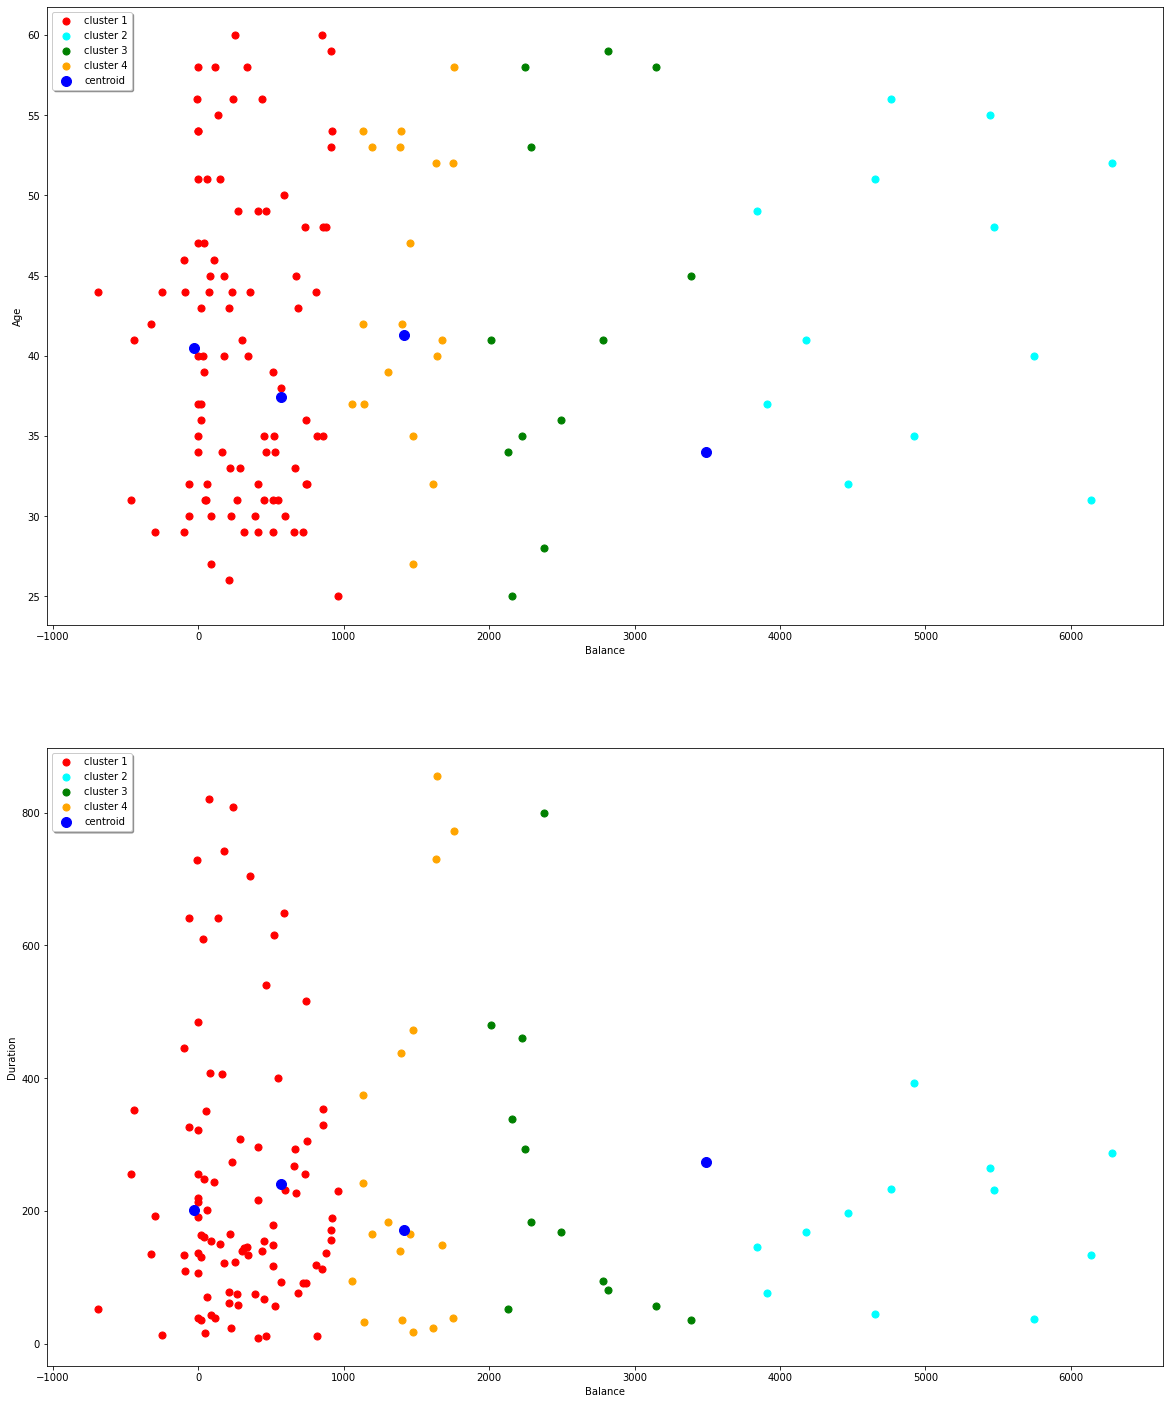

In [ ]:
#@title Agglomerative clustering
S = pd.read_csv('./BankCustomerData.csv')

S['job']=S['job'].astype('category').cat.codes
S['marital']=S['marital'].astype('category').cat.codes
S['education']=S['education'].astype('category').cat.codes
S['default']=S['default'].astype('category').cat.codes
S['housing']=S['housing'].astype('category').cat.codes
S['loan']=S['loan'].astype('category').cat.codes
S['contact']=S['contact'].astype('category').cat.codes
S['month']=S['month'].astype('category').cat.codes
S['poutcome']=S['poutcome'].astype('category').cat.codes
S['term_deposit']=S['term_deposit'].astype('category').cat.codes



"""
#PCA
pca = PCA(n_components=2)
pca.fit(S)
S = PCA.transform(pca,S)

"""
S = S[["balance","age", "duration"]] #teoricamente alto balance più tempo sta al telefono

S = S.loc[np.random.permutation(S.index)[:150]]  #SUBSAMPLE

# Undersample majority class
#S = resample(S, replace=True, n_samples=150, random_state=100)  # reproducible results
S = S[(np.abs(stats.zscore(S)) < 2).all(axis=1)]

#S = normalize(S, norm='l2', axis=1, copy=False, return_norm=False) #NOTA BENE : SENZA NORMALIZZAZIONE IL CLUSTERING AVVIENE SOLO IN BASE A BALANCE IN QUANTO E' SU UNA SCALA MOLTO PIU ALTA RISPETTO LE ALTRE FEATURES


hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(S)


filtered_label0 = S[y_hc == 0]
 
filtered_label1 = S[y_hc == 1]

filtered_label2 = S[y_hc == 2]

filtered_label3 = S[y_hc == 3]
'''
filtered_label4 = S[y_hc == 4]

filtered_label5 = S[y_hc == 5]
'''

fig, axs = plt.subplots(2)
fig.set_figheight(25)
fig.set_figwidth(20)


axs[0].set(xlabel="Balance", ylabel="Age")
axs[0].scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , s=50, color = 'red', label='cluster 1')
axs[0].scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , s=50, color = 'cyan', label='cluster 2')
axs[0].scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , s=50, color = 'green', label='cluster 3')
axs[0].scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , s=50, color = 'orange', label='cluster 4')
axs[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'blue' , label = 'centroid')
axs[0].legend(shadow=True, loc="upper left")

axs[1].set(xlabel="Balance", ylabel="Duration")
axs[1].scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,2] , s=50, color = 'red', label='cluster 1')
axs[1].scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,2] , s=50, color = 'cyan', label='cluster 2')
axs[1].scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,2] , s=50, color = 'green', label='cluster 3')
axs[1].scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,2] , s=50, color = 'orange', label='cluster 4')
axs[1].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=100, c = 'blue' , label = 'centroid')
axs[1].legend(shadow=True, loc="upper left")



In [ ]:
#@title PCA K-means

from sklearn.decomposition import PCA

S = pd.read_csv('./BankCustomerData.csv')

S['job']=S['job'].astype('category').cat.codes
S['marital']=S['marital'].astype('category').cat.codes
S['education']=S['education'].astype('category').cat.codes
S['default']=S['default'].astype('category').cat.codes
S['housing']=S['housing'].astype('category').cat.codes
S['loan']=S['loan'].astype('category').cat.codes
S['contact']=S['contact'].astype('category').cat.codes
S['month']=S['month'].astype('category').cat.codes
S['poutcome']=S['poutcome'].astype('category').cat.codes
S['term_deposit']=S['term_deposit'].astype('category').cat.codes


S = S[["balance","age","duration"]] #teoricamente alto balance più tempo sta al telefono

# Undersample
S = resample(S, replace=True, n_samples=500, random_state=100)


S = normalize(S, norm='max', axis=1, copy=False, return_norm=False) #NOTA BENE : SENZA NORMALIZZAZIONE IL CLUSTERING AVVIENE SOLO IN BASE A BALANCE IN QUANTO E' SU UNA SCALA MOLTO PIU ALTA RISPETTO LE ALTRE FEATURES

pca = PCA(n_components=2, svd_solver="auto").fit(S)
pca_x = pca.transform(S)


kmeans = KMeans(n_clusters=4,init='k-means++',max_iter = 500, n_init = 10)
ymeans = kmeans.fit_predict(S)
score = silhouette_score(S, kmeans.labels_)

print("Score silhouette clustering :"+str(score))
#selezioamo i vari cluster

fig, axs = plt.subplots(3)
fig.set_figheight(30)
fig.set_figwidth(10)

#axs[0].set(xlabel="Balance", ylabel="Age")
axs[0].scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
axs[0].scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
axs[0].scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
axs[0].scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
#axs[0].scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
#axs[0].scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')



#axs[1].set(xlabel="Age", ylabel="Duration")
axs[1].scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
axs[1].scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
axs[1].scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
axs[1].scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
#axs[1].scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
#axs[1].scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')


#axs[2].set(xlabel="Balance", ylabel="Duration")
axs[2].scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
axs[2].scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
axs[2].scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
axs[2].scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
#axs[2].scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
#axs[2].scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')


In [ ]:
#@title DBSCAN

from sklearn.neighbors import NearestNeighbors
import numpy as np

S = pd.read_csv('./BankCustomerData.csv')

S = S[["balance", "age"]] #teoricamente alto balance più tempo sta al telefono

# Undersample majority class
S = resample(S, replace=True, n_samples=150, random_state=100)  # reproducible results
 
#S = normalize(S, norm='l1', axis=0, copy=False, return_norm=False) #NOTA BENE : SENZA NORMALIZZAZIONE IL CLUSTERING AVVIENE SOLO IN BASE A BALANCE IN QUANTO E' SU UNA SCALA MOLTO PIU ALTA RISPETTO LE ALTRE FEATURES

neigh = NearestNeighbors(n_neighbors=20)
nbrs = neigh.fit(S)
distances, indices = nbrs.kneighbors(S)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])



'\nneigh = NearestNeighbors(n_neighbors=20)\nnbrs = neigh.fit(S)\ndistances, indices = nbrs.kneighbors(S)\n\ndistances = np.sort(distances, axis=0)\nplt.figure(figsize=(12,8))\nplt.plot(distances[:,1])\n'